# spam detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
df = pd.read_csv('/content/sample_data/spam.csv',encoding="ISO-8859-1").iloc[:,0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.value_counts()

v1    v2                                                                                                                                                                                                           
ham   Sorry, I'll call later                                                                                                                                                                                           30
      I cant pick the phone right now. Pls send a message                                                                                                                                                              12
      Ok...                                                                                                                                                                                                            10
spam  Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 

In [14]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [16]:
df=df.rename({'v1':'Class','v2':'Message'},axis=1)
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [ ]:
label= ["Class","Message"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%") # visualizing using pie
plt.show()

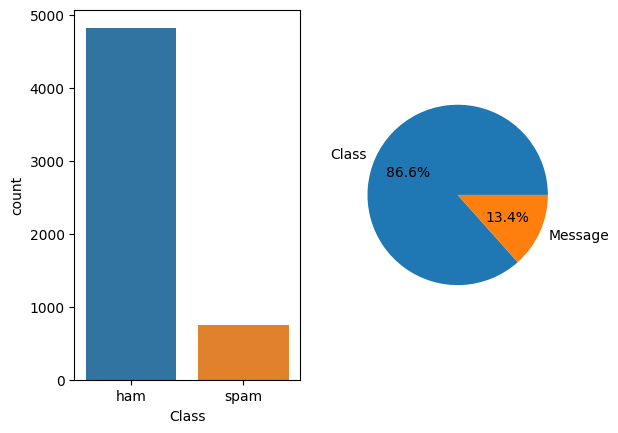

In [24]:
figure1, plot1 = plt.subplots(1,2)
x= df.Class.value_counts()
sns.countplot(x= "Class",data= df,ax=plot1[0])
label= ["Class","Message"]
plt.pie(x.values, labels =label ,autopct="%1.1f%%" );

# install library for NLP

In [29]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# defining the function for text cleaning

In [30]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [32]:
df['clean_text'] = df['Message'].apply(clean_text)
df.head()

,Class,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [33]:
X = df['clean_text']
y = df['Class']

 # define a function to get rid of stopwords present in the messages

In [38]:
def message_text_process(mess):
    no_punctuation=[char for char in mess if char not in string.punctuation]
    no_punctuation=''.join(no_punctuation)
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [39]:
# to verify that function is working
df['Message'].head(5).apply(message_text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

# text processing with vectorizer

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
words_transformer=CountVectorizer(analyzer=message_text_process).fit(df['Message'])
print(len(words_transformer.vocabulary_))

11304


In [50]:
message_bag=words_transformer.transform(df['Message'])
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bag)
message_tfidf=tfidf_transformer.transform(message_bag)
print(message_tfidf.shape)

(5572, 11304)


In [52]:
message_tfidf

<5572x11304 sparse matrix of type '<class 'numpy.float64'>'
	with 50193 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model=MultinomialNB().fit(message_tfidf,df['Class'])

# NLP model

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [54]:
message=df['Message'][4]
message_bag=words_transformer.transform([message])
tfidf=tfidf_transformer.transform(message_bag)
print('predicted',spam_detection_model.predict(tfidf)[0])

predicted ham


In [55]:
df['Message'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [56]:
df['Class'][4]

'ham'

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix

In [65]:
def Model(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
# -------------------------------------------------------------------------------------------
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
#--------------------------------------------------------------------------------------------
    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    print("Confusion Matrix:\n",plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                                                      show_absolute=True,show_normed=True,colorbar=True))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)

# Decision Tree

Confusion Matrix:
 (<Figure size 640x480 with 2 Axes>, <Axes: xlabel='predicted label', ylabel='true label'>)
Classification Report is:
               precision    recall  f1-score   support

         ham       0.95      0.99      0.97      1220
        spam       0.90      0.66      0.76       173

    accuracy                           0.95      1393
   macro avg       0.93      0.82      0.87      1393
weighted avg       0.95      0.95      0.95      1393

Accuracy: 94.90308686288586
Training Score:
 96.21919119406557


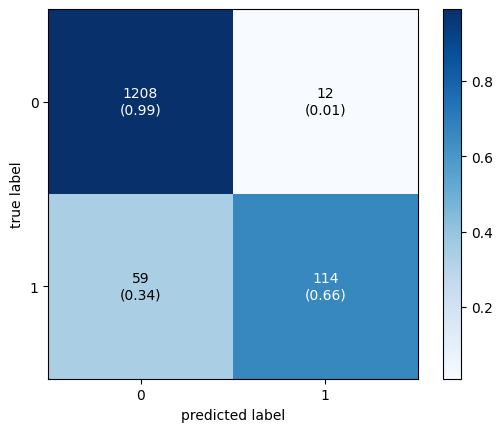

In [67]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Model(tree_clf,X,y)

* The precision for ham is 0.95, which means that 95% of the emails that were predicted to be ham were actually ham.
* The recall for ham is 0.99, which means that 99% of the actual ham emails were correctly predicted.
* A perfect F1 score is 1.0, and a score of 0.0 is a failure. The F1 score for ham is 0.97, which is a good score.
* accuracy of the model is 94.90%, which means that 94.90% of the emails were correctly classified.

# Random Forest classifier

Confusion Matrix:
 (<Figure size 640x480 with 2 Axes>, <Axes: xlabel='predicted label', ylabel='true label'>)
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.80      0.88       173

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.27207465900933
Training Score:
 100.0


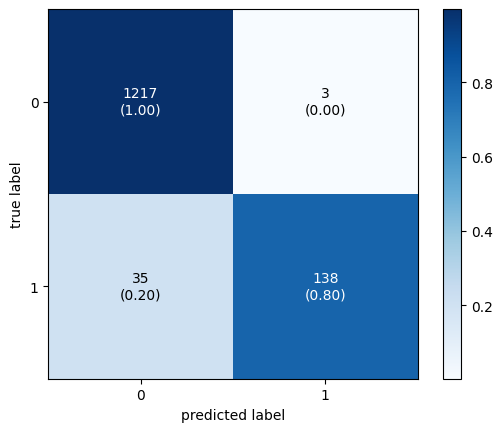

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
Model(model, X, y)

* The precision for ham is 0.97, which means that 97% of the emails that were predicted to be ham were actually ham.
* The recall for ham is 1.00, which means that 100% of the actual ham emails were correctly predicted.
* A perfect F1 score is 0.98, and a score of 0.0 is a failure. The F1 score for ham is 0.98, which is a good score.
* accuracy of the model is 97.27%, which means that 97% of the emails were correctly classified.